# **LIMPIEZA DEL DATASET**

**Carga de datos y librerías**

In [2]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.linear_model import LinearRegression

df = pd.read_csv('BetterLife.csv')

## **Limpieza de missings**

**Observar la situación inicial**

Número de missings por país: 
Country
Australia         2
Austria           0
Belgium           0
Canada            0
Chile             3
Colombia          6
Costa Rica        5
Denmark           1
Estonia           0
Finland           0
France            0
Germany           0
Greece            0
Hungary           0
Iceland           4
Ireland           0
Israel            5
Italy             0
Japan             2
South Korea       1
Lithuania         2
Luxembourg        1
Mexico            2
Netherlands       0
New Zealand       1
Norway            0
Poland            0
Portugal          1
Slovenia          1
Spain             1
Sweden            2
Switzerland       3
United Kingdom    0
United States     0
dtype: int64
Número de missings por variable: 
Country                                               0
GDP per capita (EURO)                                 0
Dwellings without basic facilities                    3
Housing expenditure                                   3
Rooms per p

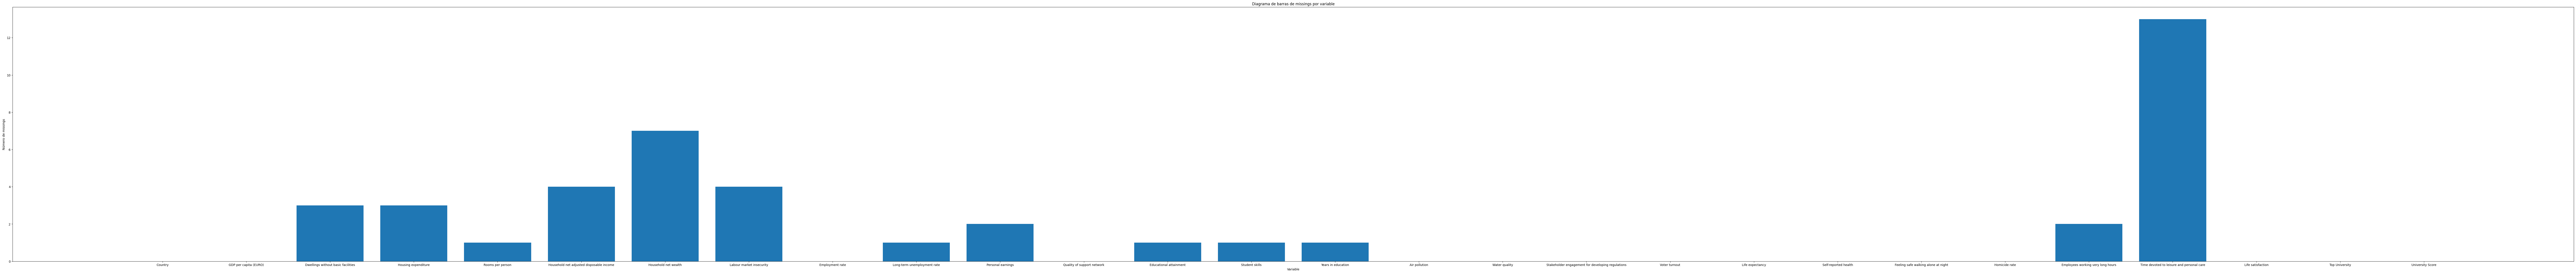

In [3]:
# Serie con el número de missings por país
s = df.isnull().sum(axis=1)
s.index = df['Country']
print('Número de missings por país: ')
print(s)

# Serie con el número de missings por variable
s = df.isnull().sum()
print('Número de missings por variable: ')
print(s)

# Diagrama de barras de missings por variable
fig, ax = plt.subplots(figsize=(150, 15))
ax.bar(s.index, s.values)
ax.set(title = 'Diagrama de barras de missings por variable', xlabel = 'Variable', ylabel = 'Número de missings')
None

**Máximos de missings permitidos**

In [4]:
# Mostrar aquellas filas con 3 o más missings y eliminarlas
countries_to_remove = list(df['Country'][df.isnull().sum(axis=1) >= 3])
print(countries_to_remove)
df = df[~df['Country'].isin(countries_to_remove)]

# Mostrar aquellas variables con 5 o más missings y eliminarlas
variables_to_remove = [col for col in df.columns if df[col].isnull().sum() >= 5]
print(variables_to_remove)
df = df.drop(columns = variables_to_remove)

None

['Chile', 'Colombia', 'Costa Rica', 'Iceland', 'Israel', 'Switzerland']
['Time devoted to leisure and personal care']


**Comprobar situación actual**

In [5]:
# Ver el número de missings por cada variable
print(df.shape)

# Mostrar las variables que tienen missings
s = df.isnull().sum()
print(s[s > 0])
None

print(f'En total, el dataset tiene {s.sum()} missings.')

(28, 27)
Dwellings without basic facilities    2
Rooms per person                      1
Household net wealth                  2
Labour market insecurity              1
Educational attainment                1
Student skills                        1
Employees working very long hours     2
dtype: int64
En total, el dataset tiene 10 missings.


**Imputación de variables simétricas (mediana)**

In [6]:
# Variables simétricas cuyos missings imputar con la mediana
symmetric_variables = ['Rooms per person', 'Educational attainment', 'Student skills', 'Employees working very long hours']
for i in symmetric_variables:
    df.fillna({i: df[i].median()}, inplace = True)

**Imputación de variables asimétricas (regresión lineal con la variable más correlacionada)**

In [7]:
# Variables con alta asimetría cuyos missins inferir
asymmetric_variables = ['Dwellings without basic facilities', 'Household net wealth', 'Labour market insecurity']

dependent_variables = asymmetric_variables
independent_variables = ['Homicide rate', 'Household net adjusted disposable income', 'Long-term unemployment rate']

for i in range(3):
    # Separa los datos en dos conjuntos: con y sin missings en la variable dependiente (objetivo)
    df_missing = df[df[dependent_variables[i]].isnull()]
    df_not_missing = df[~df[dependent_variables[i]].isnull()]

    # Entrena un modelo de regresión lineal usando la variable independiente para predecir la variable dependiente
    model = LinearRegression()
    X_train = df_not_missing[[independent_variables[i]]]    # Variable independiente (convertida a DataFrame)
    y_train = df_not_missing[dependent_variables[i]]        # Variable dependiente
    model.fit(X_train, y_train)

    # Predecir los valores faltantes de la variable dependiente usando los valores de la variable independiente
    X_missing = df_missing[[independent_variables[i]]]      # Convertida a DataFrame
    if X_missing.empty:
        continue  # Saltar esta iteración si no hay valores faltantes

    predicted_values = model.predict(X_missing)

    # Imputar los valores faltantes en 'a'
    df.loc[df[dependent_variables[i]].isnull(), dependent_variables[i]] = predicted_values

## **Transformaciones**

**Crear un dataframe únicamente con variables numéricas**

In [8]:
# Dataframe solo con las variables numéricas
df_num = df.select_dtypes(include = 'number')

In [ ]:
# Para poder observar los outliers, primero se deben normalizar las variables a una escala [0, 10]
# Dataframe con los valores normalizados a una escala [0, 10]

# Primero desplazamos los datos a un rango [0, (máx - mín)] restando los datos entre el mínimo.
# Luego, normalizamos entre el rango para que los datos estén en el rango [0, 1].
# Finalmente, multiplicamos por 10 para que estén en el rango [0, 10].

df_normalized = (df_num - df_num.min()) / (df_num.max() - df_num.min()) * 10
df_normalized

,GDP per capita (EURO),Dwellings without basic facilities,Housing expenditure,Rooms per person,Household net adjusted disposable income,Household net wealth,Labour market insecurity,Employment rate,Long-term unemployment rate,Personal earnings,...,Water quality,Stakeholder engagement for developing regulations,Voter turnout,Life expectancy,Self-reported health,Feeling safe walking alone at night,Homicide rate,Employees working very long hours,Life satisfaction,University Score
0,4.420717,0.578803,4.563107,4.666667,6.068008,5.254907,0.837438,7.727273,0.925926,7.331553,...,8.064516,7.5,10.000000,8.494624,9.272727,4.901961,0.263158,4.569288,6.190476,8.598485
1,3.786628,0.308880,5.922330,3.333333,5.944148,2.733539,0.443350,7.272727,1.203704,6.941424,...,8.064516,0.5,6.279070,7.419355,6.727273,8.627451,0.112782,1.872659,6.666667,4.179293
2,3.468980,0.270270,5.145631,6.666667,5.337175,4.321051,0.492611,4.090909,2.129630,7.166209,...,3.870968,4.0,9.069767,7.526882,7.272727,2.745098,0.338346,1.498127,4.761905,6.250000
3,3.411289,0.077220,7.961165,10.000000,5.204427,4.673521,1.182266,6.363636,0.462963,7.357135,...,7.419355,8.5,4.418605,7.526882,10.000000,7.058824,0.375940,1.123596,5.714286,7.992424
7,4.619538,0.193050,8.349515,5.333333,5.018923,0.895156,1.527094,8.181818,0.833333,7.938001,...,8.387097,4.0,8.372093,6.881720,6.545455,8.431373,0.112782,0.299625,8.095238,4.898990
8,1.429888,2.200772,2.233010,4.000000,2.154653,1.341172,1.970443,8.181818,1.111111,2.725631,...,6.129032,7.5,3.488372,3.978495,4.181818,7.254902,0.639098,0.711610,3.333333,1.414141
9,3.433762,0.154440,8.155340,5.333333,4.932049,1.817587,0.394089,7.272727,1.111111,5.643129,...,9.677419,5.0,4.651163,7.526882,6.181818,9.019608,0.375940,1.235955,10.000000,4.684343
10,2.764886,0.193050,5.825243,4.666667,5.191238,2.606993,0.837438,4.090909,2.685185,5.521049,...,3.548387,4.5,6.046512,8.387097,6.000000,6.274510,0.075188,2.771536,4.285714,8.068182
11,3.361777,0.038610,5.145631,4.666667,6.508974,2.672326,0.000000,9.545455,1.111111,7.056732,...,7.741935,3.0,6.279070,6.774194,5.818182,6.666667,0.075188,1.348315,7.142857,7.878788
12,0.750592,0.154440,6.893204,0.666667,1.296519,0.877425,10.000000,0.000000,10.000000,2.064821,...,0.000000,3.0,2.093023,7.096774,8.181818,5.294118,0.300752,1.573034,0.000000,1.691919


## **Limpieza de outliers**

El data set tiene 47 outliers distribuidos de la siguiente manera:
GDP per capita (EURO)                                2
Dwellings without basic facilities                   4
Housing expenditure                                  1
Rooms per person                                     0
Household net adjusted disposable income             1
Household net wealth                                 2
Labour market insecurity                             2
Employment rate                                      0
Long-term unemployment rate                          3
Personal earnings                                    0
Quality of support network                           3
Educational attainment                               4
Student skills                                       3
Years in education                                   2
Air pollution                                        1
Water quality                                        0
Stakeholder engagement for developing regulations    

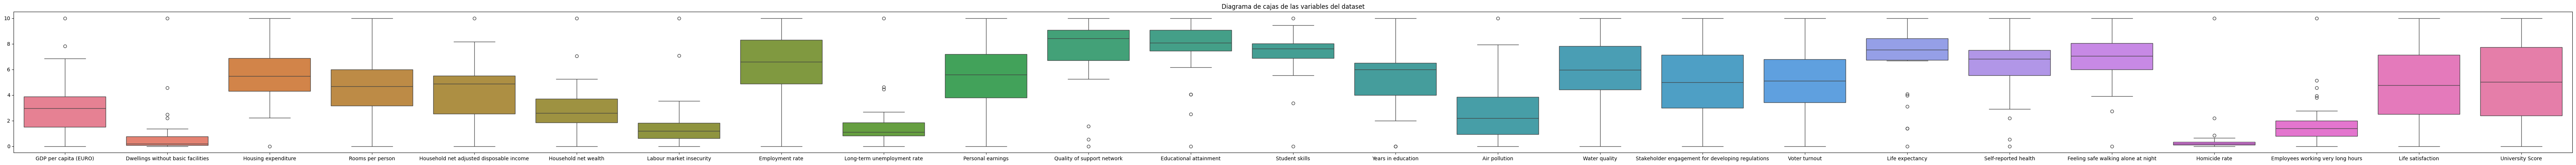

In [10]:
# Creamos un diagrama de cajas para cada variable
fig, ax = plt.subplots(figsize=(90, 5))
sns.boxplot(data = df_normalized, ax = ax)
ax.set(title = 'Diagrama de cajas de las variables del dataset')
None

# Serie con el número de outliers por variable según el método de Tukey
s = pd.Series(dtype = 'int64')
for col in df_normalized.columns:
    q1 = df_normalized[col].quantile(0.25); q3 = df_normalized[col].quantile(0.75); iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr; upper_bound = q3 + 1.5 * iqr
    s[col] = ((df_normalized[col] < lower_bound) | (df_normalized[col] > upper_bound)).sum()

print(f'El data set tiene {s.sum()} outliers distribuidos de la siguiente manera:')
print(s)


**Añadimos las variables categóricas de vuelta al dataset**

In [11]:
df_normalized['Country'] = df['Country']; df_normalized['Top University'] = df['Top University']
df_normalized = df_normalized.set_index('Country')

## **Exportanción del dataset limpio**

In [12]:
df_normalized.to_csv('BetterLife_cleaned.csv')

Mapa con la puntuación de cada país de 0 a 10 heatmap

buscar geojson con las coordenadas de europa
asignar a cada país su puntuacion